# Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

There are three main types of missing data: (1) Missing Completely at Random (MCAR), (2) Missing at Random (MAR), and (3) Missing Not at Random (MNAR).

In the dataset, the blank shows the missing values.

In Pandas, usually, missing values are represented by NaN. It stands for Not a Number.

It is important to handle the missing values appropriately.

Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values.
You may end up building a biased machine learning model, leading to incorrect results if the missing values are not handled properly.
Missing data can lead to a lack of precision in the statistical analysis.

k-NN and Random Forest algorithms can also support missing values. the k-NN algorithm considers the missing values by taking the majority of the K nearest values. Unfortunately, the scikit-learn library implementation of k-NN and RandomForest does not support the presence of the missing values.

# Q2: List down techniques used to handle missing data. Give an example of each with python code.

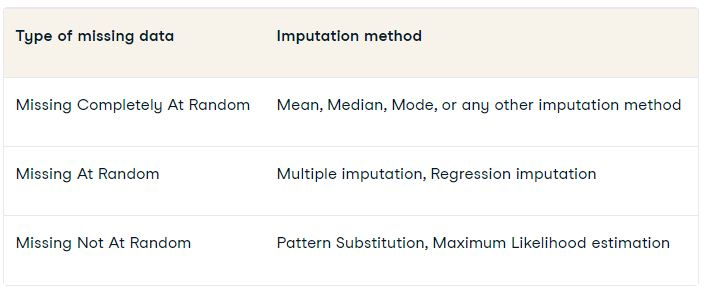

List of Methods to handle missing values in a dataset
Here is a list of popular strategies to handle missing values in a dataset

Deleting the Missing Values
Imputing the Missing Values
Imputing the Missing Values for Categorical Features
Imputing the Missing Values using Sci-kit Learn Library
Using “Missingness” as a Feature

Mean/Median Imputation
These replacement strategies  are self-explanatory. Mean and median imputations are respectively used to replace missing values of a given column with the mean and median of the non-missing values in that column. 

Normal distribution is the ideal scenario. Unfortunately, it is not always the case. This is where the median imputation can be helpful because it is not sensitive to outliers.

In Python, the fillna() function from pandas can be used to make these replacements. 

Multiple Imputation
This is a multivariate imputation technique, meaning that the missing information is filled by taking into consideration the information from the other columns. 

For instance, if the income value is missing for an individual, it is uncertain whether or not they have a mortgage. So, to determine the correct value, it is necessary to evaluate other characteristics such as credit score, occupation, and whether or not the individual owns a house.

Multiple Imputation by Chained Equations (MICE for short) is one of the most popular imputation methods in multivariate imputation. To better understand the MICE approach, let’s consider the set of variables X1, X2, … Xn, where some or all have missing values. 

The algorithm works as follows: 

For each variable, replace the missing value with a simple imputation strategy such as mean imputation, also considered as “placeholders.”
The “placeholders” for the first variable, X1, are regressed by using a regression model where X1 is the dependent variable, and the rest of the variables are the independent variables. Then X2 is used as dependent variables and the rest as independent variables. The process continues as such until all the variables are considered at least once as the dependent variable.
Those original “placeholders” are then replaced with the predictions from the regression model.
The replacement process is repeated for a number of cycles which is generally ten, according to Raghunathan et al. 2002, and the imputation is updated at each cycle. 
At the end of the cycle, the missing values are ideally replaced with the prediction values that best reflect the relationships identified in the data.
The implementation is performed using the miceforest library. 

First, we need to install the library using the pip.

In [2]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [5]:
df.shape

(891, 15)

In [7]:
df.dropna().shape

(182, 15)

In [8]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [10]:
df.dropna(axis=1).shape

(891, 11)

# Mean Value Imputation Technique:

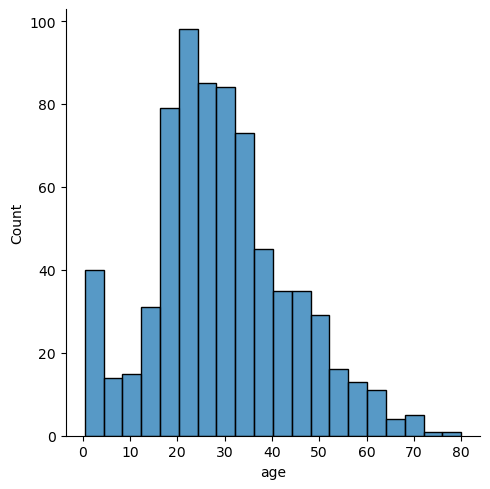

In [12]:
sns.displot(df['age'])

<AxesSubplot: xlabel='age', ylabel='Count'>

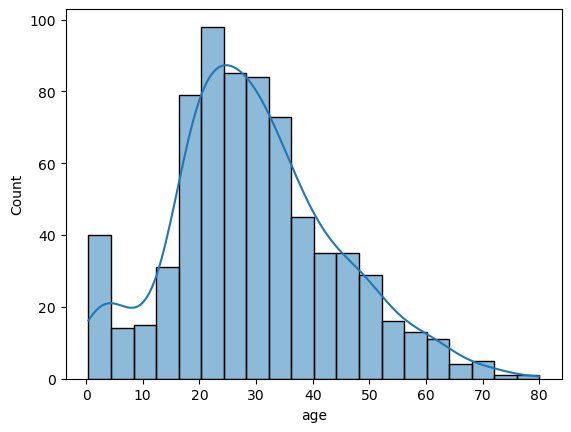

In [14]:
sns.histplot(df['age'],kde=True)

In [5]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [24]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000


In [25]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
dtype: int64

In [26]:
df['age_mean'].isnull().sum()

0

In [27]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


# Median Value Imputation Technique:

In [6]:
df['age_median']=df['age'].fillna(df['age'].median())

In [31]:
df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


# Mode Imputation Tecqnique:generally used for categorical values

In [7]:
df['embarked'].isnull().sum()

2

In [8]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [36]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
df['embarked'].notna()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: embarked, Length: 891, dtype: bool

In [38]:
df[df['embarked'].notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [9]:
mode_value =df[df['embarked'].notna()]['embarked'].mode()[0]

In [46]:
mode_value

'S'

In [10]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [49]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0,S
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0,S
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,S
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0,C


In [11]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [13]:
df['embarked_mode'].isnull().sum()

0

# Random smapling imputation:

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,S


In [16]:
df.isnull().sum()

survived           0
pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
age_mean           0
age_median         0
embarked_mode      0
dtype: int64

In [20]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [27]:
df['embark_town'].isnull().sum()

2

In [44]:
# First Method
df['embark_town_random_sample']=df['embark_town'].fillna('Cherbourg')

In [24]:
df['embark_town_random_sample'].isnull().sum()


0

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode,embark_town_random_sample
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,S,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,S,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,S,Southampton


In [29]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [34]:
df['embark_town'].unique()[2]

'Queenstown'

In [37]:
random_sample_value=df['embark_town'].unique()[2]

In [38]:
random_sample_value

'Queenstown'

In [45]:
# Second Method
df['embark_town_random_sample_new']=df['embark_town'].fillna(random_sample_value)

In [41]:
df['embark_town_random_sample_new']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town_random_sample_new, Length: 891, dtype: object

In [42]:
df['embark_town_random_sample_new'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [43]:
df['embark_town_random_sample_new'].isnull().sum()

0

# Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Imbalanced data typically refers to classification tasks where the classes are not represented equally.

For example, you may have a binary classification problem with 100 instances out of which 80 instances are labeled with Class-1, and the remaining 20 instances are marked with Class-2.

This is essentially an example of an imbalanced dataset, and the ratio of Class-1 to Class-2 instances is 4:1.

Following are the significant problems of imbalanced learning:

When the dataset has underrepresented data, the class distribution starts skew.

Due to the inherent complex characteristics of the dataset, learning from such data requires new understandings, new approaches, new principles, and new tools to transform data. And moreover, this cannot anyway guarantee an efficient solution to your business problem. In worst cases, it might turn to complete wastes with zero residues to reuse.

# Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down- sampling are required.

Upsampling refers to manually adding data samples to the minority classes in order to create a more balanced dataset.
Downsampling refers to removing records from majority classes in order to create a more balanced dataset. The simplest way of downsampling majority classes is by randomly removing records from that category.

In [46]:
import numpy as np
import pandas as pd
np.random.seed(123)
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [47]:
n_class_0,n_class_1

(900, 100)

In [49]:
# Create Dataframe with Imbalanced Dataset
class_0=pd.DataFrame({
        'Feature_1':np.random.normal(loc=2,scale=1,size=n_class_0),
        'Feature_2':np.random.normal(loc=2,scale=1,size=n_class_0),
         'target':[0]*n_class_0
})

class_1=pd.DataFrame({
        'Feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
        'Feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
         'target':[1]*n_class_1
})

In [50]:
class_0

,Feature_1,Feature_2,target
0,0.914369,2.551302,0
1,2.997345,2.419589,0
2,2.282978,3.815652,0
3,0.493705,1.747250,0
4,1.421400,1.707996,0
...,...,...,...
895,2.238761,1.996845,0
896,0.893614,1.569340,0
897,2.366732,1.853584,0
898,3.023906,3.160176,0


In [51]:
class_1

,Feature_1,Feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [52]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [53]:
df

,Feature_1,Feature_2,target
0,0.914369,2.551302,0
1,2.997345,2.419589,0
2,2.282978,3.815652,0
3,0.493705,1.747250,0
4,1.421400,1.707996,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [54]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

# Upsampling

In [56]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [57]:
[df_minority,df_majority]

[     Feature_1  Feature_2  target
 900   1.699768   2.139033       1
 901   1.367739   2.025577       1
 902   1.795683   1.803557       1
 903   2.213696   3.312255       1
 904   3.033878   3.187417       1
 ..         ...        ...     ...
 995   1.376371   2.845701       1
 996   2.239810   0.880077       1
 997   1.131760   1.640703       1
 998   2.902006   0.390305       1
 999   2.697490   2.013570       1
 
 [100 rows x 3 columns],
      Feature_1  Feature_2  target
 0     0.914369   2.551302       0
 1     2.997345   2.419589       0
 2     2.282978   3.815652       0
 3     0.493705   1.747250       0
 4     1.421400   1.707996       0
 ..         ...        ...     ...
 895   2.238761   1.996845       0
 896   0.893614   1.569340       0
 897   2.366732   1.853584       0
 898   3.023906   3.160176       0
 899   1.789944   1.358488       0
 
 [900 rows x 3 columns]]

In [58]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [68]:
df_minority_upsampled.shape

(900, 3)

In [77]:
df_minority_upsampled['target'].value_counts()

1    900
Name: target, dtype: int64

In [66]:
df_minority_upsampled.head()

,Feature_1,Feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [73]:
df_upsmapled=pd.concat([df_majority,df_minority_upsampled])

In [74]:
df_upsmapled

,Feature_1,Feature_2,target
0,0.914369,2.551302,0
1,2.997345,2.419589,0
2,2.282978,3.815652,0
3,0.493705,1.747250,0
4,1.421400,1.707996,0
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [75]:
df_upsmapled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

# Down Sampling

In [78]:
import numpy as np
import pandas as pd
np.random.seed(123)
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

class_0=pd.DataFrame({
        'Feature_1':np.random.normal(loc=2,scale=1,size=n_class_0),
        'Feature_2':np.random.normal(loc=2,scale=1,size=n_class_0),
         'target':[0]*n_class_0
})

class_1=pd.DataFrame({
        'Feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
        'Feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
         'target':[1]*n_class_1
})

In [79]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [80]:
df

,Feature_1,Feature_2,target
0,0.914369,2.551302,0
1,2.997345,2.419589,0
2,2.282978,3.815652,0
3,0.493705,1.747250,0
4,1.421400,1.707996,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [82]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [ ]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [90]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [91]:
df_majority_downsampled.shape

(100, 3)

In [92]:
df_majority_downsampled.value_counts()

Feature_1  Feature_2  target
-0.251535  1.617913   0         1
 2.261989  1.210429   0         1
 2.673491  0.603241   0         1
 2.628320  0.504891   0         1
 2.588686  1.295280   0         1
                               ..
 1.646000  2.711288   0         1
 1.596634  2.081491   0         1
 1.584381  1.269325   0         1
 1.578921  1.686405   0         1
 5.571579  2.850721   0         1
Length: 100, dtype: int64

In [87]:
df_majority_downsampled['target'].value_counts()

0    100
Name: target, dtype: int64

In [93]:
[[df_majority_downsampled,df_minority]]

[[     Feature_1  Feature_2  target
  70    2.468439   3.720920       0
  827   3.089165   1.535101       0
  231   2.753869   1.030202       0
  588   2.588686   1.295280       0
  39    2.283627   3.012868       0
  ..         ...        ...     ...
  398   1.831574   2.553775       0
  76    1.596634   2.081491       0
  196   1.730707   2.611238       0
  631   1.704171   2.671673       0
  751   1.446596   2.804438       0
  
  [100 rows x 3 columns],
       Feature_1  Feature_2  target
  900   1.699768   2.139033       1
  901   1.367739   2.025577       1
  902   1.795683   1.803557       1
  903   2.213696   3.312255       1
  904   3.033878   3.187417       1
  ..         ...        ...     ...
  995   1.376371   2.845701       1
  996   2.239810   0.880077       1
  997   1.131760   1.640703       1
  998   2.902006   0.390305       1
  999   2.697490   2.013570       1
  
  [100 rows x 3 columns]]]

In [94]:
df_downsmapled=pd.concat([df_majority_downsampled,df_minority])

In [96]:
df_downsmapled

,Feature_1,Feature_2,target
70,2.468439,3.720920,0
827,3.089165,1.535101,0
231,2.753869,1.030202,0
588,2.588686,1.295280,0
39,2.283627,3.012868,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [98]:
df_downsmapled.target.value_counts()

0    100
1    100
Name: target, dtype: int64

# Q5: What is data Augmentation? Explain SMOTE.

Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.

# https://www.datacamp.com/tutorial/complete-guide-data-augmentation
Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.  

Augmented vs. Synthetic data
Augmented data is driven from original data with some minor changes. In the case of image augmentation, we make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set. 

Synthetic data is generated artificially without using the original dataset. It often uses DNNs (Deep Neural Networks) and GANs (Generative Adversarial Networks) to generate synthetic data. 

Note: the augmentation techniques are not limited to images. You can augment audio, video, text, and other types of data too. 


When Should You Use Data Augmentation?:-

To prevent models from overfitting.
The initial training set is too small.
To improve the model accuracy.
To Reduce the operational cost of labeling and cleaning the raw dataset. 



Limitations of Data Augmentation
The biases in the original dataset persist in the augmented data.
Quality assurance for data augmentation is expensive. 
Research and development are required to build a system with advanced applications. For example, generating high-resolution images using GANs can be challenging.
Finding an effective data augmentation approach can be challenging. 

Imbalanced Data Handling Techniques: There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution.

SMOTE
Near Miss Algorithm


SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.



NearMiss Algorithm – Undersampling
NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.
To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.

# Q6: What are outliers in a dataset? Why is it essential to handle outliers?

Outliers are observations in a dataset that differ significantly from the rest of the data points. They can occur due to errors or anomalies in the data collection process, or they may be legitimate observations that are simply rare or extreme.

Outliers can sometimes lead to misleading, inconsistent, and inaccurate results if they are not properly accounted for. Therefore, it is essential to identify and deal with outliers to obtain accurate and meaningful results from the data analysis.

There are several ways to detect outliers, such as the percentile method, IQR method, and z-score method. Outliers, once detected, can be handled in several ways, such as removal, transformation, imputation, etc.

Outliers are the observations in a dataset that deviate significantly from the rest of the data. In any data science project, it is essential to identify and handle outliers, as they can have a significant impact on many statistical methods, such as means, standard deviations, etc., and the performance of ML models. Outliers can sometimes indicate errors or anomalies in the data.

Outliers are also called aberrations, abnormal points, anomalies, etc. It is essential to detect and handle outliers in a dataset as it can have a significant impact on many statistical methods, such as mean, variance, etc., and the performance of the ML models. It can lead to misleading, inconsistent, and inaccurate results if they are not properly accounted for.

# Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

Fortunately, there are proven techniques to deal with missing data.

Imputation vs. Removing Data
 When dealing with missing data, data scientists can use two primary methods to solve the error: imputation or the removal of data.

The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.

The other option is to remove data. When dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis. In some situations, observation of specific events or factors may be required.

In [ ]:
List of Methods to handle missing values in a dataset
Here is a list of popular strategies to handle missing values in a dataset

Deleting the Missing Values
Imputing the Missing Values
Imputing the Missing Values for Categorical Features
Imputing the Missing Values using Sci-kit Learn Library
Using “Missingness” as a Feature

# Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

when we have large data set and a small percentage of data is missing, we can delete the missing values or we can use the imputation techniques like mean/mode/median to fill NaN values.

# Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

when we are working on a medical diagnosis project and we find that majority of patients in the dataset do not have the condition of interest ,while minority of patients have the condition of interest then we can use the up-sampling method to evaluate the performance of ML model on this imbalanced dataset.

# Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

Resampling (Oversampling and Undersampling)
This technique is used to upsample or downsample the minority or majority class. When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling. After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

In [ ]:
Sklearn.utils resample can be used for both undersamplings the majority class and oversample minority class instances.
we can use the down sampling method and use from sklearn.utils import resample.

# Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [ ]:
from imblearn.over_sampling import SMOTE